# Análise de Dados em Grafos
## Trabalho 01
- Aluno: José Freitas Alves Neto
- Matricula: 2519203

# Imports

In [ ]:
!pip install networkx --upgrade
!pip install igraph --upgrade
import networkx as nx
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
from networkx.algorithms import community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.3 MB/s eta 0:00:00


# Questão 01
- Escolher 5 datasets de grafos.

In [ ]:
def extrair_zip(caminho_zip, destino):
    # Abre o arquivo zip no modo de leitura
    with zipfile.ZipFile(caminho_zip, 'r') as arquivo_zip:
        # Extrai todo o conteúdo para a pasta de destino
        arquivo_zip.extractall(destino)
    print(f"Conteúdo extraído com sucesso para: {destino}")

def igraph_to_networkx(arquivo_gml):
    # Lê o arquivo e cria o grafo
    grafo = ig.Graph.Read_GML(arquivo_gml)
    # Cria um grafo vazio do NetworkX
    nx_graph = nx.Graph()

    # Adiciona os nós do grafo igraph ao grafo NetworkX, mantendo os atributos
    for vertex in grafo.vs:
        nx_graph.add_node(vertex.index, **vertex.attributes())

    # Adiciona as arestas do grafo igraph ao grafo NetworkX, mantendo os atributos
    for edge in grafo.es:
        source, target = edge.tuple
        nx_graph.add_edge(source, target, **edge.attributes())

    return nx_graph
# Baixando dataset de Rede Neural
!wget https://public.websites.umich.edu/~mejn/netdata/celegansneural.zip
caminho_zip = '/content/celegansneural.zip'
destino = 'caminho/grafos_extraidos'
extrair_zip(caminho_zip, destino)
G_rede_neural = igraph_to_networkx('/content/caminho/grafos_extraidos/celegansneural.gml')

# Baixando dataset de Clube de Karatê de Zachary
!wget https://public.websites.umich.edu/~mejn/netdata/karate.zip
caminho_zip = '/content/karate.zip'
destino = 'caminho/grafos_extraidos'
extrair_zip(caminho_zip, destino)
G_karate = igraph_to_networkx('/content/caminho/grafos_extraidos/karate.gml')

--2025-04-12 23:46:43--  https://public.websites.umich.edu/~mejn/netdata/celegansneural.zip
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12687 (12K) [application/zip]
Saving to: ‘celegansneural.zip’

celegansneural.zip  100%[===================>]  12.39K  --.-KB/s    in 0s      

2025-04-12 23:46:43 (150 MB/s) - ‘celegansneural.zip’ saved [12687/12687]

Conteúdo extraído com sucesso para: caminho/grafos_extraidos
--2025-04-12 23:46:43--  https://public.websites.umich.edu/~mejn/netdata/karate.zip
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 970 [application/zip]
Saving to: ‘karate.zip’

karate.zip     

## Visualizando os grafos

- Rede Neural
- O dataset do C. elegans mapeia as conexões do seu sistema neural, onde cada nó representa um neurônio e cada aresta indica uma sinapse ou junção elétrica. Compilado a partir dos dados experimentais de White et al. (1986) e analisado por Watts e Strogatz (1998), ele destaca propriedades "small-world" da rede, servindo como referência essencial em estudos de neurociência e redes complexas.

<ipython-input-3-ea99619d156f>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('turbo', len(comunidades)),


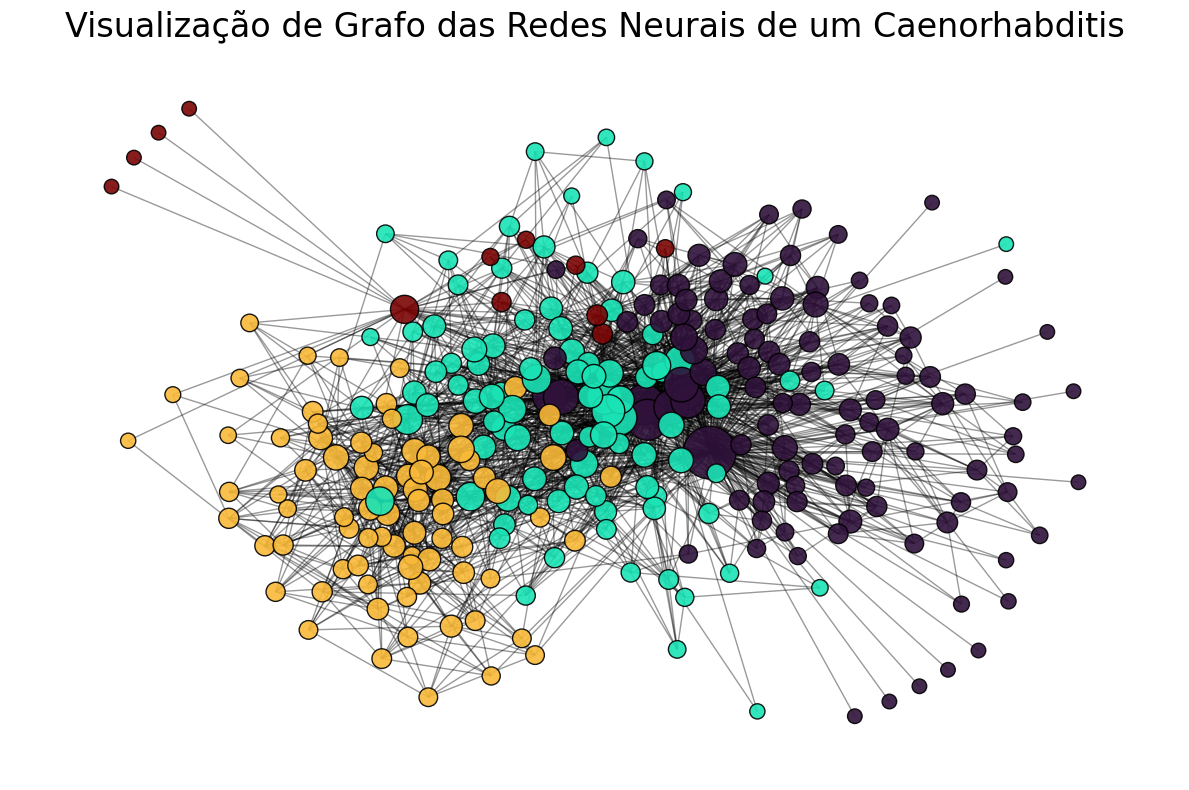

In [ ]:
def plotar_grafo_legivel(G,title = "Visualização de Grafo das Redes Neurais de um Caenorhabditis"):
    comunidades = list(community.greedy_modularity_communities(G))
    mapa_comunidades = {}
    for i, c in enumerate(comunidades):
        for no in c:
            mapa_comunidades[no] = i
    lista_cores = [mapa_comunidades[no] for no in G.nodes()]
    pos = nx.spring_layout(G, k=0.15, iterations=50, seed=42)
    lista_tamanho_nos = [100 + 10 * G.degree(no) for no in G.nodes()]

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos,
                           node_size=lista_tamanho_nos,
                           node_color=lista_cores,
                           cmap=plt.cm.get_cmap('turbo', len(comunidades)),
                           linewidths=1.0,
                           edgecolors='black',
                           alpha=0.9)
    nx.draw_networkx_edges(G, pos, alpha=0.4, width=1.0)

    plt.title(title, fontsize=24)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plotar_grafo_legivel(G_rede_neural)

- Karatê

<ipython-input-3-ea99619d156f>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('turbo', len(comunidades)),


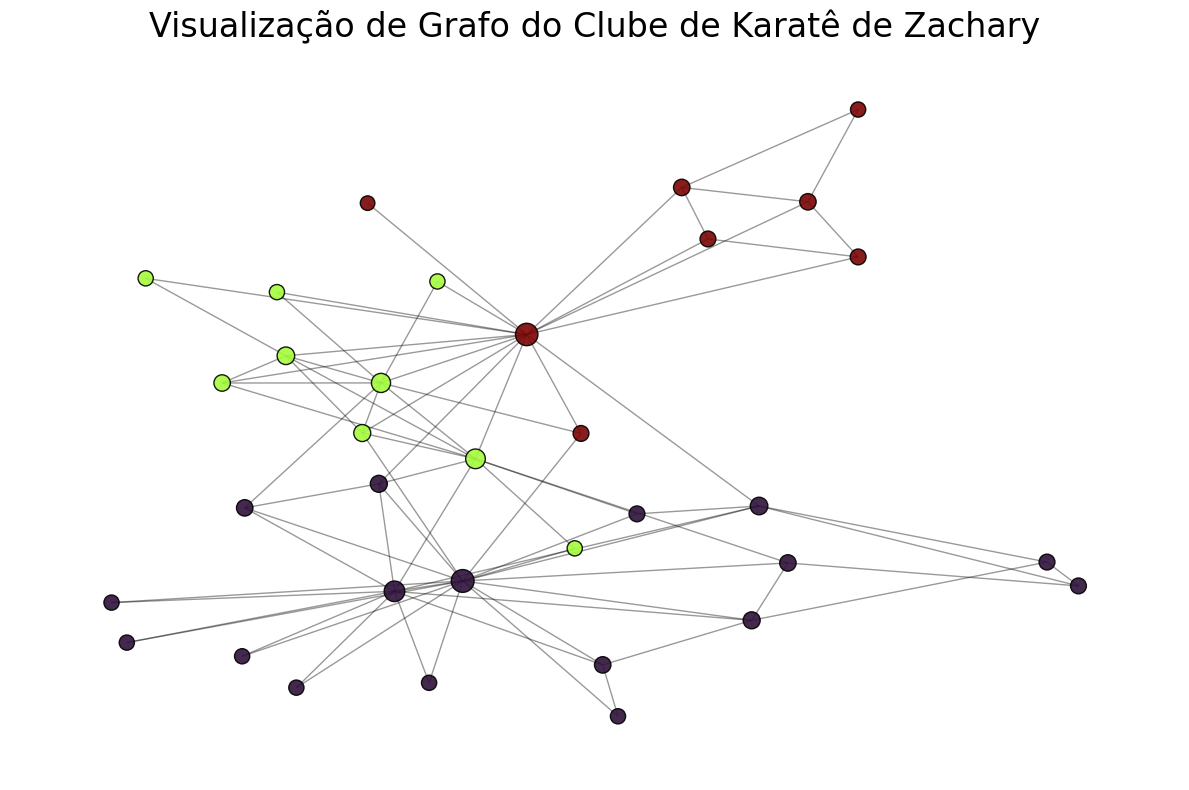

In [ ]:
 plotar_grafo_legivel(G_karate,title='Visualização de Grafo do Clube de Karatê de Zachary')

# Questão 02
- Quanto à distribuição dos graus dos grafos, calcular : PDF (Probability
Distribution Function) e a CCDF (Complementary Cumulative Distribution
Function).

## Função para calcular o PDF

In [ ]:
def funcao_que_calcula_PDF(grafo):
    # Calculando o Função de Densidade de Probabilidade
    degree = dict(grafo.degree()).values()
    df = pd.Series(degree)
    df_hist = df.value_counts(normalize=True)
    # Gerando gráfico
    plt.figure(figsize=(16,9))
    plt.bar(df_hist.index,df_hist.values,edgecolor = 'black', color = 'orange')
    # plt.title('PDF da Distribuição de Graus')
    plt.xlabel("Grau")
    plt.ylabel("Probabilidade")
    plt.grid(True,alpha = 0.3)
    plt.show()

## Função para calcular o CCDF

In [ ]:
def funcao_que_calcula_CCDF(grafo):
  # Calculando o Função de Densidade de Probabilidade
  degree = dict(grafo.degree()).values()
  df = pd.Series(degree)
  df_hist = df.value_counts(normalize=True)
  df_hist.sort_index(inplace = True)
  df_hist = df_hist.cumsum()
  df_hist = 1 - df_hist
  # Gerando gráfico
  plt.figure(figsize=(16,9))
  plt.bar(df_hist.index,df_hist.values,edgecolor = 'black', color = 'orange')
  # plt.title('CCDF da Distribuição de Graus')
  plt.xlabel("Grau")
  plt.ylabel("Probabilidade")
  plt.grid(True,alpha = 0.3)
  plt.yticks([x/100 for x in range(0,101,20)])
  plt.xscale('log')
  plt.show()

## Aplicando no Dataset de Rede Neural

### Calcular o PDF

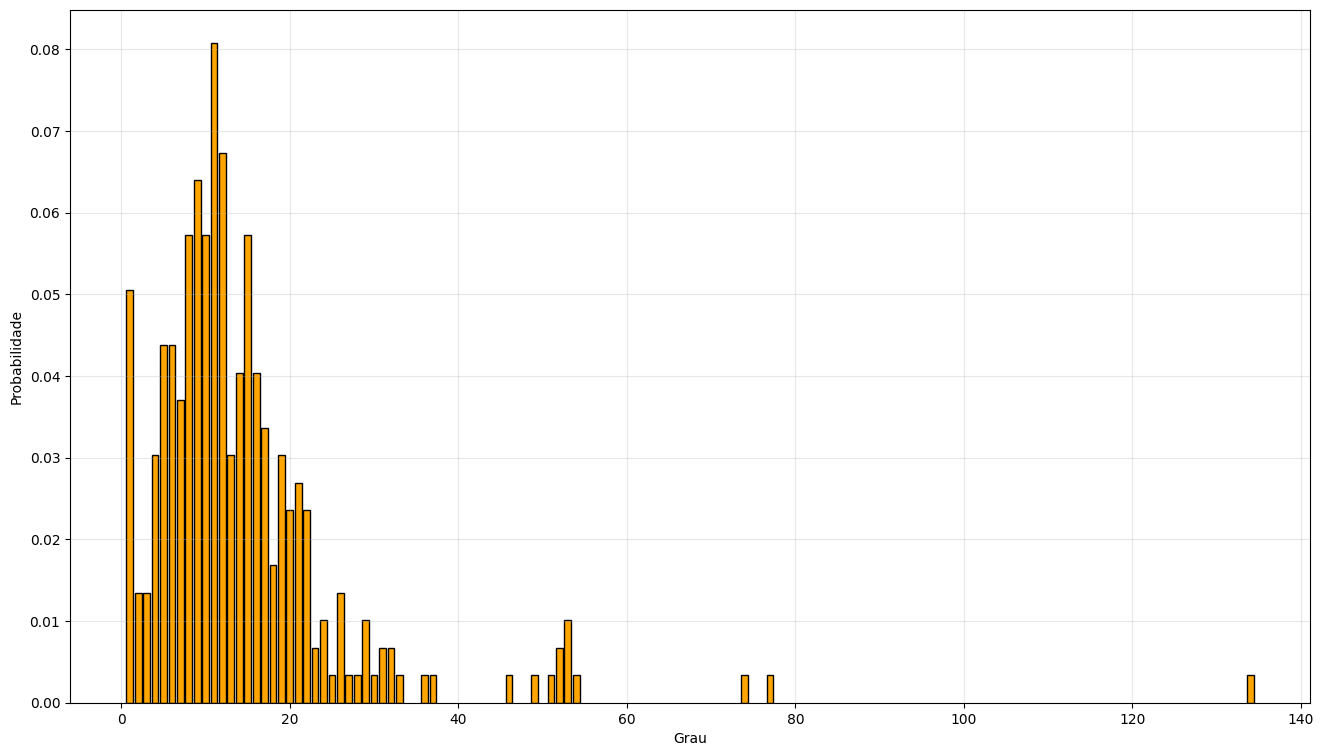

In [ ]:
funcao_que_calcula_PDF(G_rede_neural)

### Calcular o CCDF

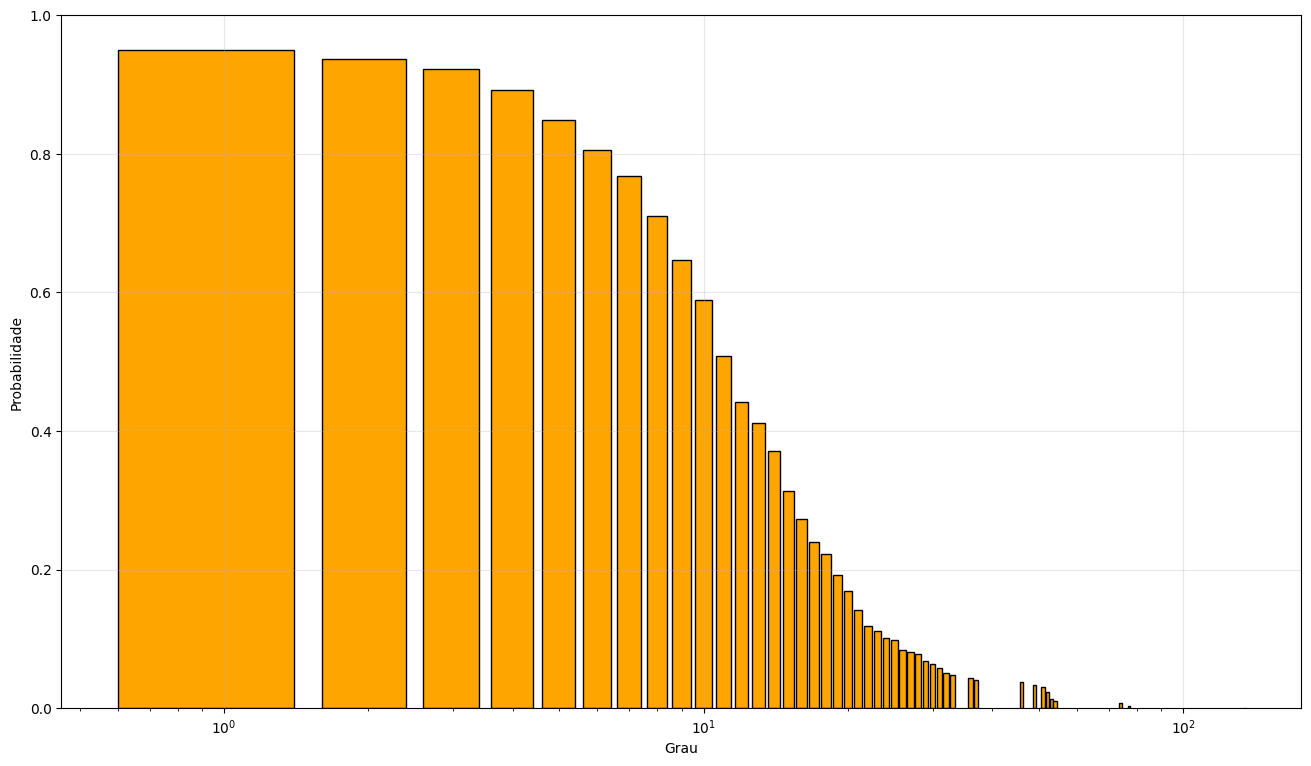

In [ ]:
funcao_que_calcula_CCDF(G_rede_neural)

# Questão 03
- A partir da escolha de 2 vértices, determinar todos os possíveis caminhos entre
eles.

- Função para encontrar os caminhos entre 2 pontos

In [ ]:
def caminhos_entre_2_pontos(grafo,ponto_inicial,ponto_final):
    caminhos = list(nx.all_simple_paths(grafo, source=ponto_inicial, target=ponto_final))
    return caminhos

- Aplicando no Dataset do Karatê

In [ ]:
caminhos_karate = caminhos_entre_2_pontos(G_karate,0,1)
for x in caminhos_karate:
  print(f'Possível caminho: {x}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 22, 33, 13, 3, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 22, 33, 13, 3, 7, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 22, 33, 19, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 22, 33, 30, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 26, 33, 8, 30, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 26, 33, 13, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 26, 33, 13, 3, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 26, 33, 13, 3, 7, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 26, 33, 19, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 26, 33, 30, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 33, 8, 30, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 33, 13, 1]
Possível caminho: [0, 31, 28, 2, 27, 24, 25, 23, 32, 29, 33, 13, 3, 1]
Possív

In [ ]:
print(f'Total de caminhos possíveis: {len(caminhos_karate)}')

Total de caminhos possíveis: 80137


- Plotando grafo de 1 caminho

<ipython-input-12-abbc0382fda9>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('turbo', len(comunidades)),


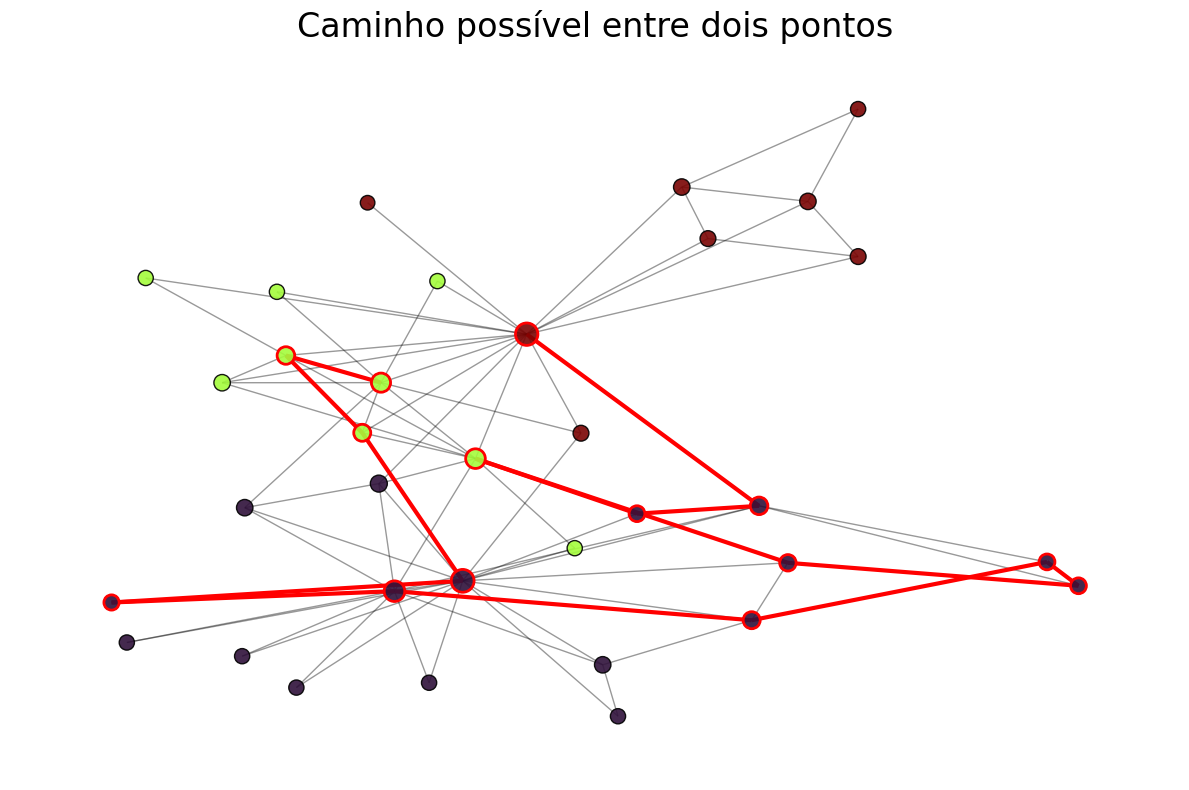

In [ ]:
def plotar_grafo_caminho_destaque(G, caminho, title=""):
    comunidades = list(community.greedy_modularity_communities(G))
    mapa_comunidades = {}
    for i, c in enumerate(comunidades):
        for no in c:
            mapa_comunidades[no] = i
    lista_cores = [mapa_comunidades[no] for no in G.nodes()]
    pos = nx.spring_layout(G, k=0.15, iterations=50, seed=42)
    lista_tamanho_nos = [100 + 10 * G.degree(no) for no in G.nodes()]

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos,
                           node_size=lista_tamanho_nos,
                           node_color=lista_cores,
                           cmap=plt.cm.get_cmap('turbo', len(comunidades)),
                           linewidths=1.0,
                           edgecolors='black',
                           alpha=0.9)
    nx.draw_networkx_edges(G, pos, alpha=0.4, width=1.0)

    # Destacar o caminho: cria lista de arestas que fazem parte do caminho
    caminho_arestas = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos,
                           edgelist=caminho_arestas,
                           edge_color='red',
                           width=3.0,
                           alpha=1.0)

    # Opcional: destacar nós do caminho com contorno ou tamanho diferente
    nx.draw_networkx_nodes(G, pos,
                           nodelist=caminho,
                           node_size=[lista_tamanho_nos[list(G.nodes()).index(no)] for no in caminho],
                           node_color='none',
                           edgecolors='red',
                           linewidths=2)

    plt.title(title, fontsize=24)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plotar_grafo_caminho_destaque(G_karate,[0, 31, 28, 2, 27, 24, 25, 23, 32, 22, 33, 13, 3, 1],"Caminho possível entre dois pontos")

# Questão 04
- A partir da escolha de 2 vértices, determinar o menor caminho.

- Função para encontrar o menor caminho<br>
  *Vale salientar que estamos usando o método de Dijkstra.*

In [ ]:
def menor_caminho_entre_2_pontos(grafo,ponto_inicial,ponto_final):
    caminho_minimo = nx.dijkstra_path(grafo, source=ponto_inicial, target=ponto_final)
    return caminho_minimo

- Aplicando no DataSet do Karatê

In [ ]:
menor_caminho = menor_caminho_entre_2_pontos(G_karate,16,20)
print(f'O menor caminho é: {menor_caminho}')

O menor caminho é: [16, 5, 0, 2, 32, 20]


- Verificando o menor caminho

<ipython-input-12-abbc0382fda9>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('turbo', len(comunidades)),


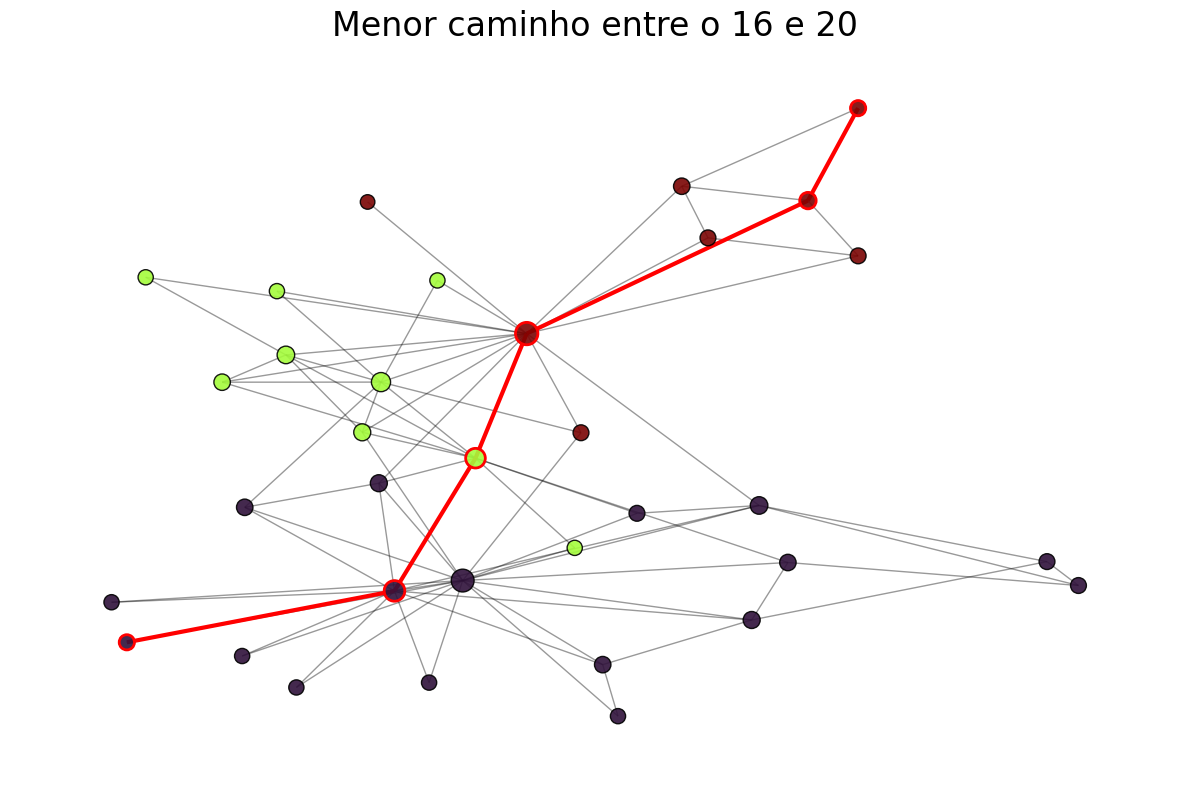

In [ ]:
plotar_grafo_caminho_destaque(G_karate,[16, 5, 0, 2, 32, 20],'Menor caminho entre o 16 e 20')

# Questão 05
-  Determinar a distância média entre todos os pares de vértices.

- Função para determinar a distância média

In [ ]:
def calcular_distancia_media(G):
    # Verifica se o grafo é conexo (para grafos não direcionados)
    if not nx.is_connected(G):
        print("O grafo não é conexo. O cálculo será feito apenas sobre os pares de vértices conectados.")

    soma_distancias = 0
    contagem = 0
    for no, distancias in nx.all_pairs_shortest_path_length(G):
        for alvo, d in distancias.items():
            if no != alvo:
                soma_distancias += d
                contagem += 1
    if contagem > 0:
        return soma_distancias / contagem
    return 0

- Aplicando função no DataSet do Karatê<br>

In [ ]:
distancia_media = calcular_distancia_media(G_karate)
print(f'A Distância média entre os pares de vertices é {distancia_media}')

A Distância média entre os pares de vertices é 2.408199643493761


# Questão 06
- A partir da escolha de um vértice, determinar a excentricidade.

- Função para calcular a excentricidade

In [ ]:
def calcular_excentricidade(grafo,vertice):
  excentricidadee = nx.eccentricity(grafo, v  = [vertice])
  ecc = excentricidadee[vertice]
  return f"Excentricidade do vértice {vertice}: {ecc}"

- Aplicando no Dataset do Karatê

In [ ]:
excentricidade = calcular_excentricidade(G_karate,1)
print(excentricidade)

Excentricidade do vértice 1: 3


- Plotando gráfico do caminho da excentricidade do verticida 1

In [ ]:
def eccentricity_path_from_source(G, source):
    if source not in G.nodes:
        raise ValueError("O vértice de início não está presente no grafo.")

    # Calcula os comprimentos dos menores caminhos a partir de 'source'
    lengths = nx.single_source_shortest_path_length(G, source)

    # Identifica o vértice com a maior distância (excentricidade de 'source')
    target = max(lengths, key=lengths.get)
    ecc_value = lengths[target]

    # Calcula o caminho mínimo entre 'source' e 'target'
    path = nx.shortest_path(G, source=source, target=target)

    return source, target, ecc_value, path

src, target, ecc, path = eccentricity_path_from_source(G_karate, 1)
print("Caminho de excentricidade a partir do ponto de início:")
print(f"De {src} até {target} (excentricidade = {ecc}): {path}")


Caminho de excentricidade a partir do ponto de início:
De 1 até 16 (excentricidade = 3): [1, 0, 5, 16]


<ipython-input-12-abbc0382fda9>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('turbo', len(comunidades)),


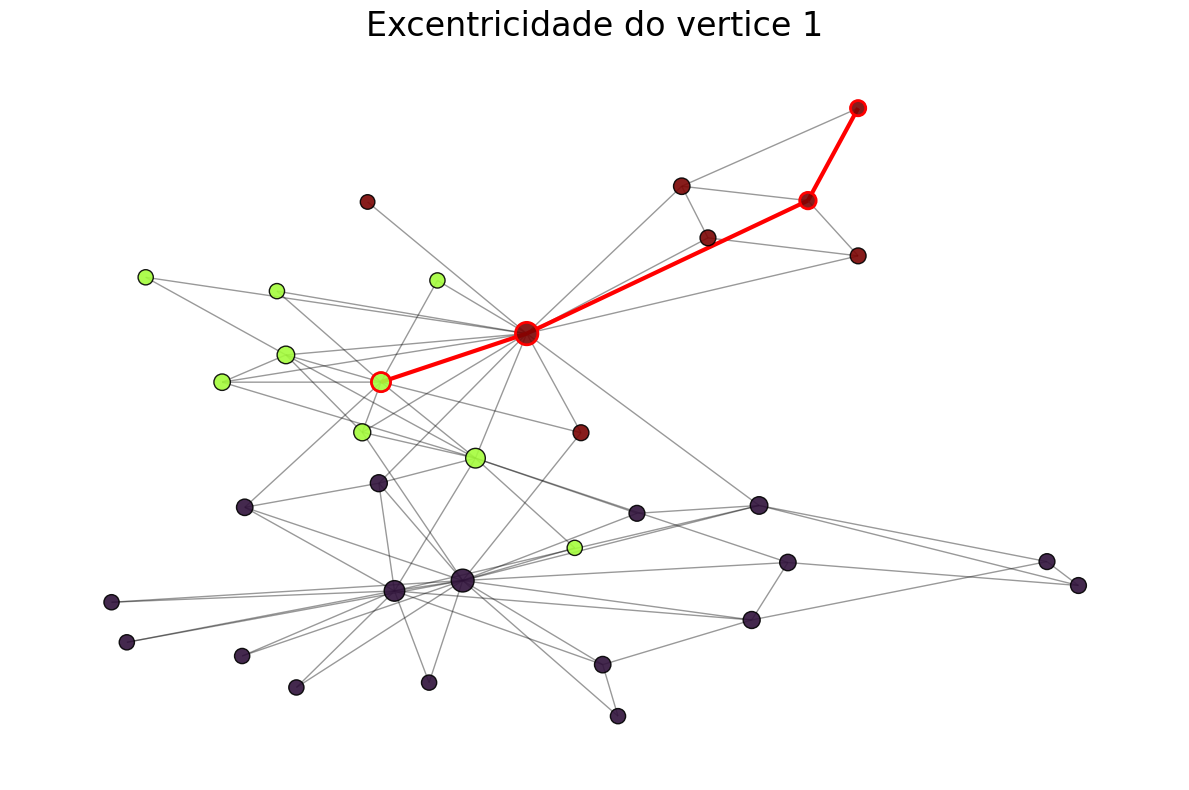

In [ ]:
plotar_grafo_caminho_destaque(G_karate,[1, 0, 5, 16],'Excentricidade do vertice 1')

# Questão 07
- Determinar o diâmetro da rede.

In [ ]:
def diametro_grafo(grafo):
    excentricidadee = nx.eccentricity(grafo)
    diametro = max(excentricidadee.values())
    return f"Diametro do grafo é: {diametro}"

- Aplicando no DataSet do Karate

In [ ]:
diametro_grafo = diametro_grafo(G_karate)
print(diametro_grafo)

Diametro do grafo é: 5


# Questão 08
- Determinar a densidade dos grafos. <br>
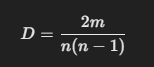<br>
Onde m é o número de arestas e n o número de vertices.

- Função para calcular a densidade

In [ ]:
def densidade_grafo(grafo):
  n = len(grafo.nodes())
  m = len(grafo.edges())
  densidade = (2 * m)/(n*(n-1))
  return densidade

- Aplicando função no DataSet da Rede Neural

In [ ]:
densidade_g = densidade_grafo(G_rede_neural)
print(f'A Densidade do grafo é: {round(densidade_g,3)}%')

A Densidade do grafo é: 0.049%


# Questão 09
- Verificar a existência de ciclos Eulerianos e Hamiltonianos nos Grafos.

## Circulo Euleriano
- Para verificar se basta aplicara função "is_eulerian" do NetworkX

- Aplicando no DataSet de Rede Neural

In [ ]:
if nx.is_eulerian(G_rede_neural):
    print("O grafo possui ciclo euleriano.")
else:
    print("O grafo NÃO possui ciclo euleriano.")

O grafo NÃO possui ciclo euleriano.


## Ciclo Hamiltoniano

- Criando função

In [ ]:
def verificar_ciclo_hamiltoniano(grafo):
    nos = list(grafo.nodes())
    caminho = [nos[0]]
    visitados = {nos[0]: True}

    def buscar_ciclo(caminho, visitados):
        if len(caminho) == len(nos):
            if grafo.has_edge(caminho[-1], caminho[0]):
                return caminho + [caminho[0]]
            return None
        for no in nos:
            if no not in visitados and grafo.has_edge(caminho[-1], no):
                visitados[no] = True
                caminho.append(no)
                resultado = buscar_ciclo(caminho, visitados)
                if resultado:
                    return resultado
                caminho.pop()
                del visitados[no]
        return None

    ciclo = buscar_ciclo(caminho, visitados)
    if ciclo:
        print("Ciclo Hamiltoniano encontrado:")
        print(" -> ".join(map(str, ciclo)))
    else:
        print("Ciclo Hamiltoniano não encontrado.")

- Verificando se o Dataset do Karatê é Hamiltoniano

In [ ]:
verificar_ciclo_hamiltoniano(G_karate)

Ciclo Hamiltoniano não encontrado.


# Questão 10
- Retornar todos os cliques em um grafo.

- Função para retornar os cliques de um grafo

In [ ]:
def retornar_cliques(grafo):
    cliques = list(nx.find_cliques(grafo))
    return cliques

- Aplicando função no DataSet do Karatê

In [ ]:
len(cliques)

1386

In [ ]:
cliques = retornar_cliques(G_rede_neural)
for x in cliques:
  print(x)

[0, 4, 8, 2]
[0, 4, 9]
[0, 5, 8, 3]
[0, 5, 9]
[0, 5, 201]
[0, 7, 1]
[0, 7, 2]
[0, 7, 3]
[0, 7, 134]
[0, 7, 6]
[0, 7, 9]
[0, 201, 2]
[0, 201, 6]
[1, 129, 12, 84]
[1, 130, 7]
[1, 130, 72]
[1, 130, 74]
[1, 130, 108, 142]
[1, 130, 12, 131]
[1, 130, 12, 84]
[1, 130, 142, 84]
[1, 193, 195, 214]
[1, 193, 12, 84]
[1, 136, 10, 115, 138, 124]
[1, 136, 10, 135, 138, 124]
[1, 136, 10, 135, 102]
[1, 136, 141]
[1, 72, 214]
[1, 10, 142, 102]
[1, 12, 16, 84, 241]
[1, 12, 16, 84, 116]
[1, 12, 138]
[1, 142, 116, 84]
[1, 113, 101]
[1, 113, 102, 135]
[1, 113, 135, 138, 124]
[1, 113, 140, 141]
[1, 113, 140, 127]
[1, 113, 141, 116]
[1, 113, 115, 16]
[1, 113, 115, 138, 124]
[1, 113, 115, 127]
[1, 113, 116, 16]
[1, 84, 101]
[2, 4, 99]
[2, 4, 8, 67]
[2, 4, 8, 203]
[2, 4, 168, 172, 125]
[2, 4, 180, 179]
[2, 4, 180, 84]
[2, 4, 118, 224, 67]
[2, 4, 118, 224, 84, 125]
[2, 4, 118, 161, 162]
[2, 4, 118, 172, 160, 125]
[2, 4, 118, 172, 226, 204, 207]
[2, 4, 118, 172, 226, 84, 203]
[2, 4, 118, 172, 226, 84, 125]
[2, 4

- Plotando clique

Caminho de excentricidade:
De 1 até 185 (excentricidade = 3): [1, 0, 2, 185]


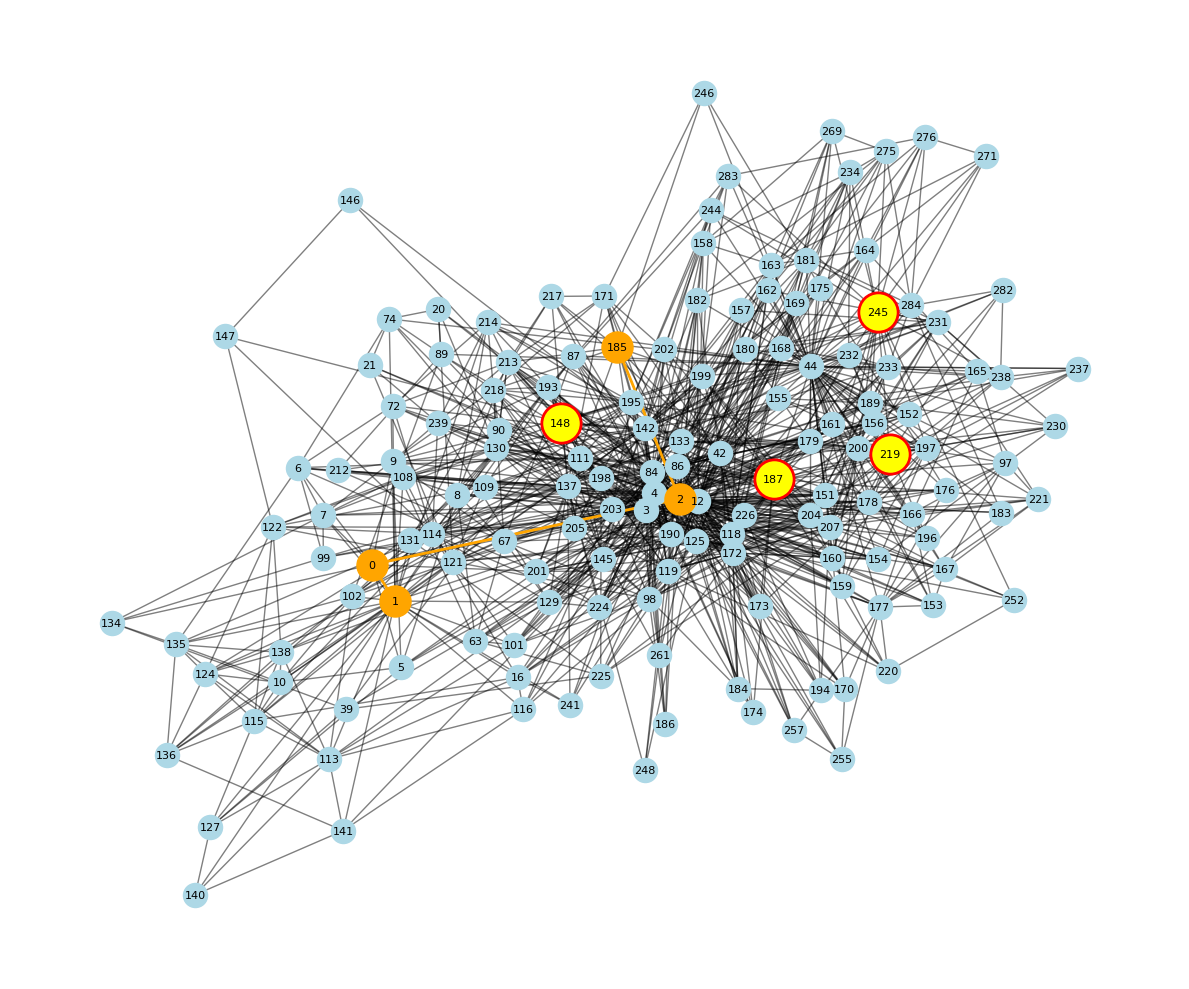

In [ ]:
def eccentricity_path_from_source(G, source):
    if source not in G.nodes:
        raise ValueError("O vértice de início não está presente no grafo.")
    lengths = nx.single_source_shortest_path_length(G, source)
    target = max(lengths, key=lengths.get)
    ecc_value = lengths[target]
    path = nx.shortest_path(G, source=source, target=target)
    return source, target, ecc_value, path

# Calcula o caminho de excentricidade a partir do vértice 1
src, target, ecc, path = eccentricity_path_from_source(G_rede_neural, 1)
print("Caminho de excentricidade:")
print(f"De {src} até {target} (excentricidade = {ecc}): {path}")

# Nós de interesse a destacar
nos_destaque = [148, 187, 245, 219]

# Seleciona nós do caminho e de interesse
nodes_focus = set(path + nos_destaque)
# Inclui os vizinhos imediatos para contexto
for n in list(nodes_focus):
    nodes_focus.update(G_rede_neural.neighbors(n))

subG = G_rede_neural.subgraph(nodes_focus)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subG, seed=42)

# Desenha todas as arestas e nós do subgrafo
nx.draw_networkx_edges(subG, pos, alpha=0.5)

# Nós padrão
default_nodes = [n for n in subG.nodes if n not in set(path) and n not in nos_destaque]
nx.draw_networkx_nodes(subG, pos, nodelist=default_nodes, node_color='lightblue', node_size=300)
nx.draw_networkx_labels(subG, pos, font_size=8)

# Destaca o caminho de excentricidade
nx.draw_networkx_nodes(subG, pos, nodelist=path, node_color='orange', node_size=500)
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(subG, pos, edgelist=path_edges, edge_color='orange', width=2)

# Destaca os nós de interesse com foco extra
nx.draw_networkx_nodes(subG, pos, nodelist=nos_destaque, node_color='yellow', node_size=800, edgecolors='red', linewidths=2)

plt.title("", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


# Questão 11
- Retornar o clique máximo em um grafo.

- Função para calcular o clique máximo

In [ ]:
def retornar_cliques_maximos(grafo):
    cliques = list(nx.find_cliques(grafo))
    max_clique = max(cliques, key=len)
    return max_clique

- Aplicando no Dataset do Karate

In [ ]:
cliques_max = retornar_cliques_maximos(G_rede_neural)
print(f'Clique máximo: {cliques_max}')

Clique máximo: [2, 12, 84, 86, 172, 201, 125, 111]


- Plotando o click máximo

Caminho de excentricidade:
De 1 até 185 (excentricidade = 3): [1, 0, 2, 185]


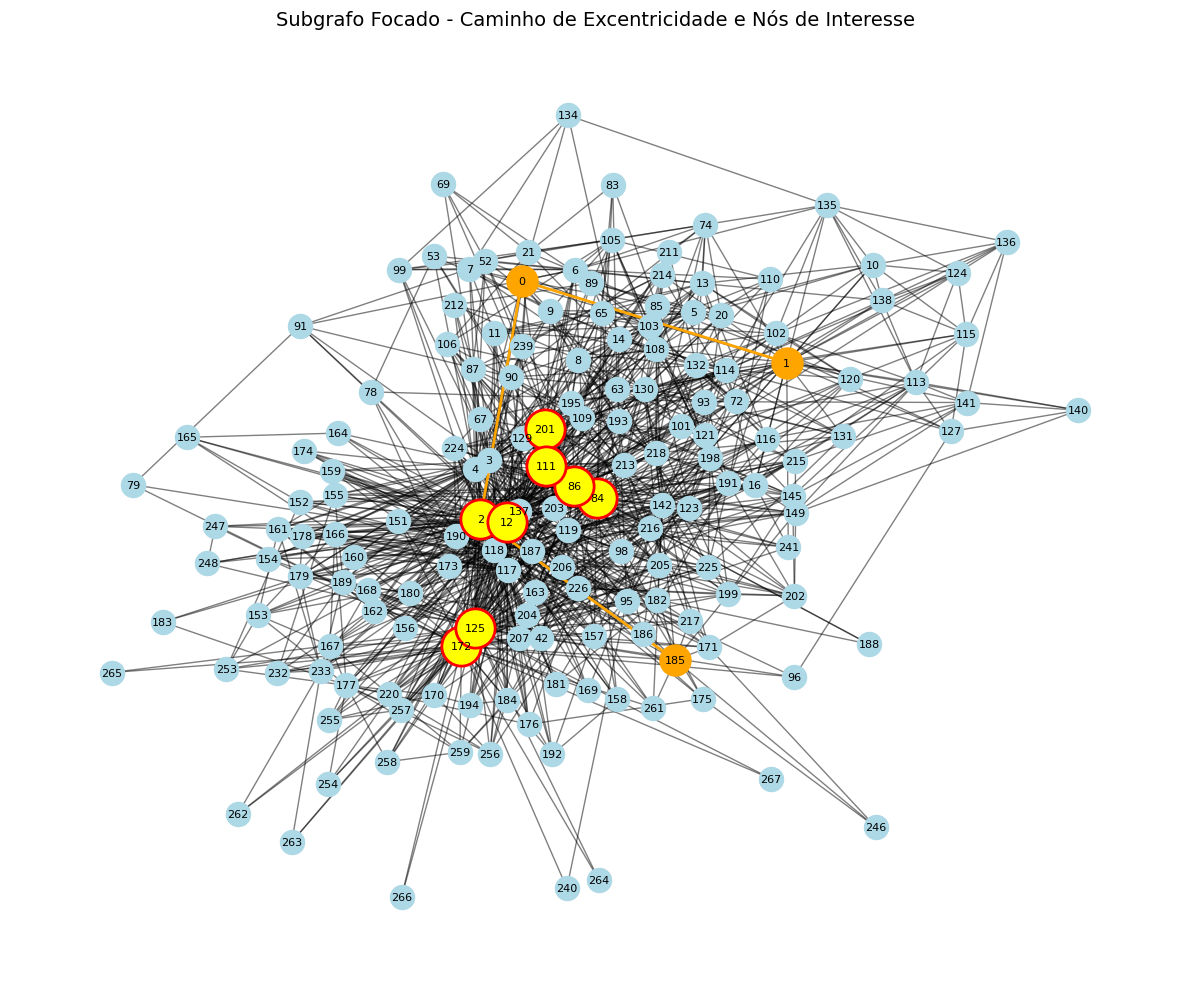

In [ ]:
def eccentricity_path_from_source(G, source):
    if source not in G.nodes:
        raise ValueError("O vértice de início não está presente no grafo.")
    lengths = nx.single_source_shortest_path_length(G, source)
    target = max(lengths, key=lengths.get)
    ecc_value = lengths[target]
    path = nx.shortest_path(G, source=source, target=target)
    return source, target, ecc_value, path

# Calcula o caminho de excentricidade a partir do vértice 1
src, target, ecc, path = eccentricity_path_from_source(G_rede_neural, 1)
print("Caminho de excentricidade:")
print(f"De {src} até {target} (excentricidade = {ecc}): {path}")

# Nós de interesse a destacar
nos_destaque = [2, 12, 84, 86, 172, 201, 125, 111]

# Seleciona nós do caminho e de interesse
nodes_focus = set(path + nos_destaque)
# Inclui os vizinhos imediatos para contexto
for n in list(nodes_focus):
    nodes_focus.update(G_rede_neural.neighbors(n))

subG = G_rede_neural.subgraph(nodes_focus)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subG, seed=42)

# Desenha todas as arestas e nós do subgrafo
nx.draw_networkx_edges(subG, pos, alpha=0.5)

# Nós padrão
default_nodes = [n for n in subG.nodes if n not in set(path) and n not in nos_destaque]
nx.draw_networkx_nodes(subG, pos, nodelist=default_nodes, node_color='lightblue', node_size=300)
nx.draw_networkx_labels(subG, pos, font_size=8)

# Destaca o caminho de excentricidade
nx.draw_networkx_nodes(subG, pos, nodelist=path, node_color='orange', node_size=500)
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(subG, pos, edgelist=path_edges, edge_color='orange', width=2)

# Destaca os nós de interesse com foco extra
nx.draw_networkx_nodes(subG, pos, nodelist=nos_destaque, node_color='yellow', node_size=800, edgecolors='red', linewidths=2)

plt.title("Subgrafo Focado - Caminho de Excentricidade e Nós de Interesse", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


# Questão 12
- Identificar se o grafo é totalmente conectado e retornar o número de
componentes.

In [ ]:
def verificar_conectividade(grafo):
    componentes = list(nx.connected_components(grafo))
    num_componentes = len(componentes)
    # Se a quantidade de componentes conectados foi 1 significa que o grafo é totalmente conectado
    if num_componentes == 1:
        print("O grafo é totalmente conectado.")
    else:
        print("O grafo NÃO é totalmente conectado.")

    print("Número de componentes:", num_componentes)
    return num_componentes

- Aplicando no DataSet de Redes Neurais

In [ ]:
verificar_conectividade(G_rede_neural)

O grafo é totalmente conectado.
Número de componentes: 1


1

# Questão 13
- Retornar o conjunto de nós da maior componente.

In [ ]:
def maior_componente(grafo):
    componentes = list(nx.connected_components(grafo))
    num_componentes = len(componentes)
    maior_componente = 0
    max_nos_componentes = 0
    if num_componentes == 1:
      print("Maior componente:", componentes[0])
    else:
      for x in range(num_componentes):
        quantidade_nos_componente = componentes[x]
        if quantidade_nos_componente > max_nos_componentes:
          max_nos_componentes = quantidade_nos_componente
          maior_componente = x
      print(f'Maior componente: {componentes[x]}')

- Aplicando a função no Dataset da Rede Neural

In [ ]:
maior_componente(G_rede_neural)

Maior componente: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

- Plot maior componente

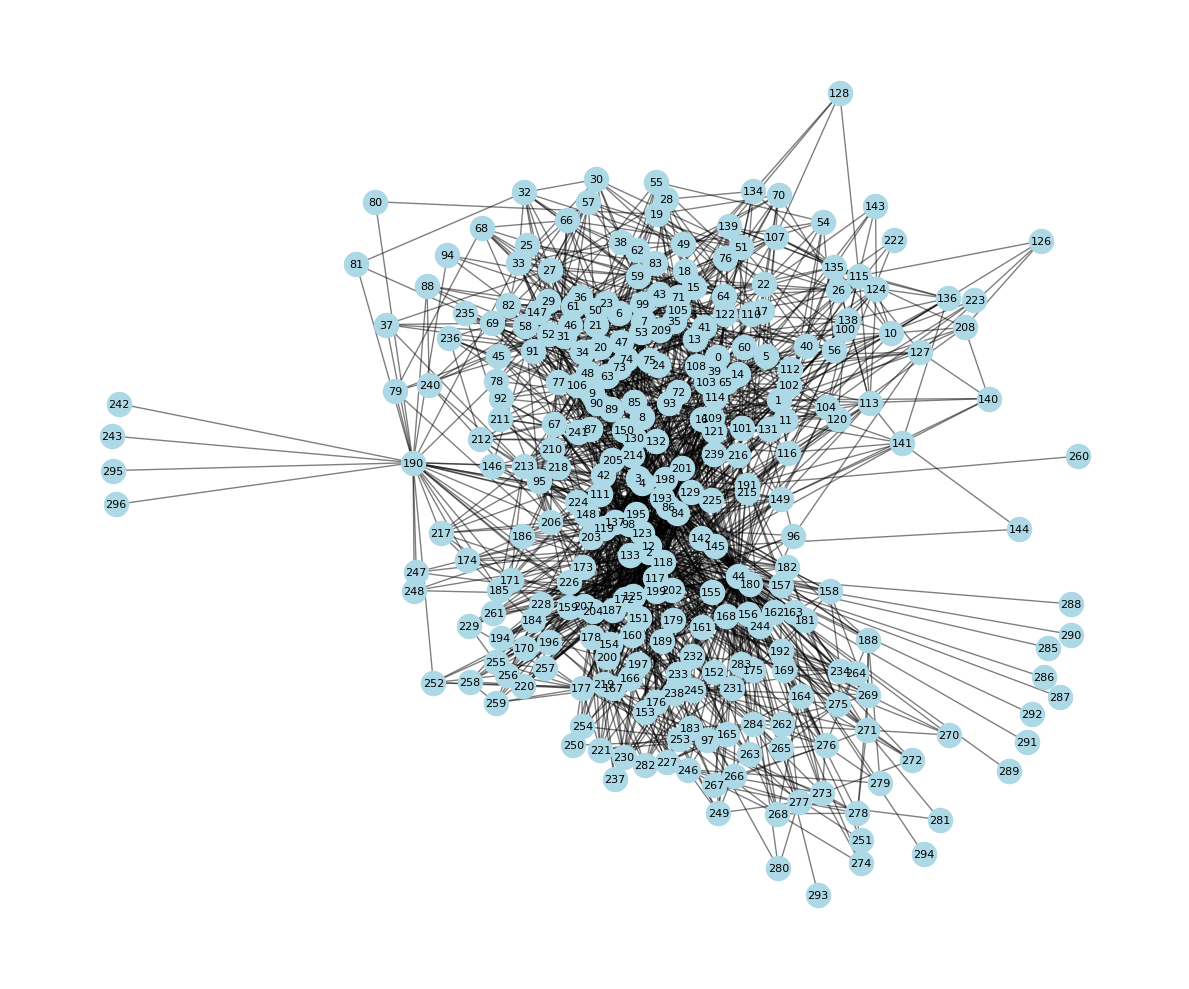

In [ ]:
# Extrai a maior componente conexa do grafo
largest_cc = max(nx.connected_components(G_rede_neural), key=len)
G_largest = G_rede_neural.subgraph(largest_cc)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_largest, seed=42)
nx.draw_networkx_edges(G_largest, pos, alpha=0.5)
nx.draw_networkx_nodes(G_largest, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_labels(G_largest, pos, font_size=8)
plt.title("", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


# Questão 14
-  Verificar se dois Grafos são Isomórficos.

In [ ]:
def verificar_isomorfismo(grafo1, grafo2):
    # Verificação preliminar: se o número de nós ou arestas for diferente,
    # os grafos não podem ser isomórficos.
    if len(grafo1.nodes()) != len(grafo2.nodes()):
        return False
    if len(grafo1.edges()) != len(grafo2.edges()):
        return False

    # Aplicando algoritimo VF2
    gm = nx.algorithms.isomorphism.GraphMatcher(grafo1, grafo2)
    return gm.is_isomorphic()

- Aplicando a função

In [ ]:
# Verifica se os grafos são isomórficos e exibe o resultado
if verificar_isomorfismo(G_karate, G_rede_neural):
    print("Os grafos 1 e 2 são isomórficos!")
else:
    print("Os grafos 1 e 2 NÃO são isomórficos!")

Os grafos 1 e 2 NÃO são isomórficos!


# Questão 15
- Verificar a existência de bridges nos grafos.

In [ ]:
def verificar_bridges(grafo):
    # A função nx.bridges retorna um gerador com as bridges existentes
    bridges = list(nx.bridges(grafo))
    return bridges

- Aplicando a função

In [ ]:
# Verifica bridges no grafo G
bridges = verificar_bridges(G_rede_neural)

if bridges:
    print("As seguintes bridges foram encontradas:")
    for bridge in bridges:
        print(bridge)
else:
    print("Não foram encontradas bridges no grafo.")

As seguintes bridges foram encontradas:
(44, 285)
(44, 286)
(44, 287)
(44, 288)
(44, 289)
(44, 290)
(44, 291)
(44, 292)
(44, 293)
(44, 294)
(190, 242)
(190, 243)
(190, 295)
(190, 296)
(191, 260)


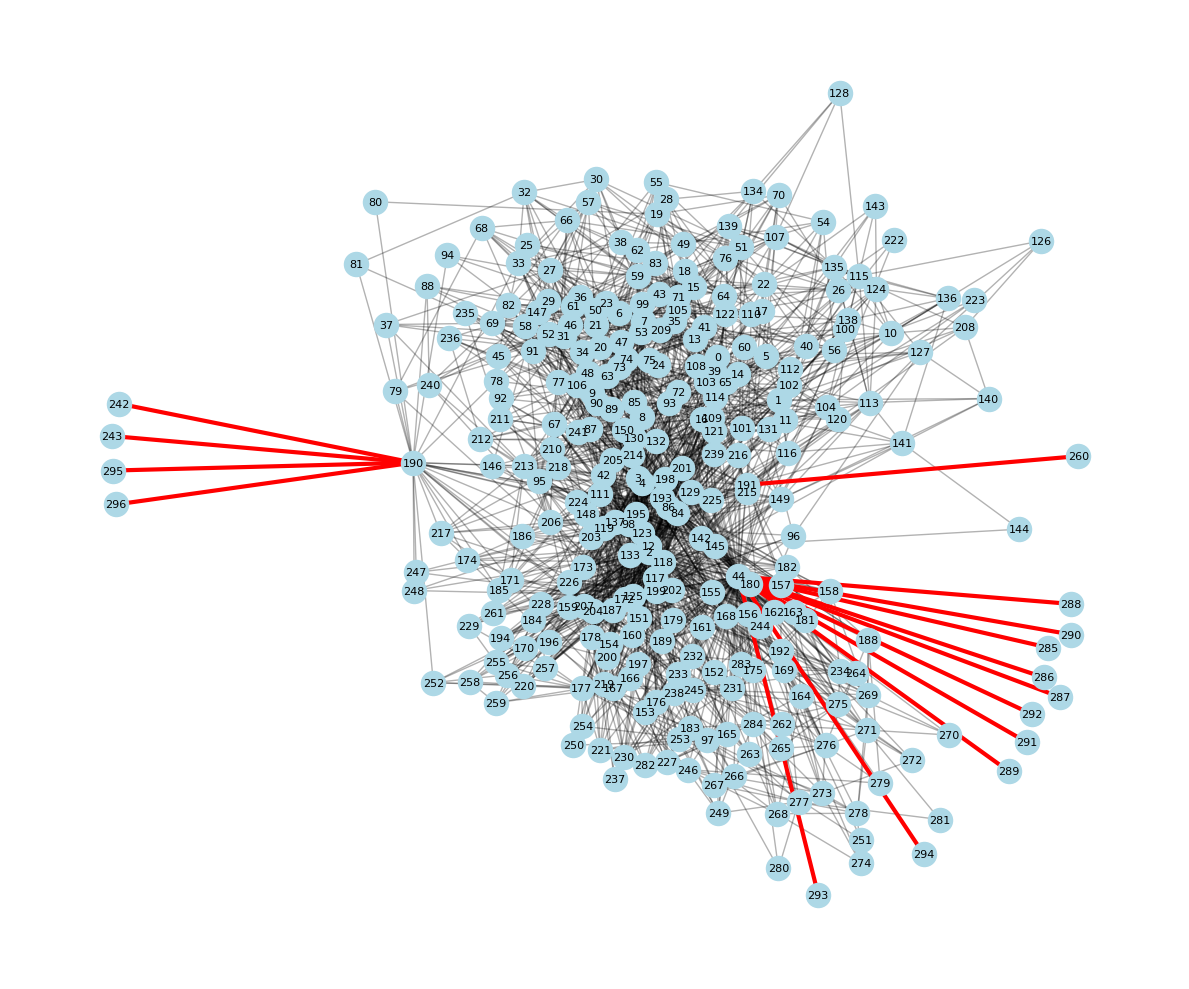

In [ ]:
# Lista das arestas que serão destacadas
bridge_edges = [
    (44, 285),
    (44, 286),
    (44, 287),
    (44, 288),
    (44, 289),
    (44, 290),
    (44, 291),
    (44, 292),
    (44, 293),
    (44, 294),
    (190, 242),
    (190, 243),
    (190, 295),
    (190, 296),
    (191, 260)
]

# Configura a figura
plt.figure(figsize=(12, 10))

# Define um layout para o grafo
pos = nx.spring_layout(G_rede_neural, seed=42)

# Desenha os nós do grafo
nx.draw_networkx_nodes(G_rede_neural, pos, node_color='lightblue', node_size=300)

# Desenha os rótulos dos nós
nx.draw_networkx_labels(G_rede_neural, pos, font_size=8)

# Desenha todas as arestas em cor mais discreta
nx.draw_networkx_edges(G_rede_neural, pos, alpha=0.3)

# Destaque: Desenha as arestas (bridges) especificadas em vermelho e com maior espessura
nx.draw_networkx_edges(G_rede_neural, pos, edgelist=bridge_edges, edge_color='red', width=3)

plt.title("", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()
